# Capstone Project: Clustering Model Comparison  
## **Step 1: Import Libraries**

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


## **Step 2: Create and Standardize Datasets**  

In [8]:
# Set random seed for reproducibility
np.random.seed(42)

# Create Datasets
n_samples = 300
X_moons, _ = make_moons(n_samples=n_samples, noise=0.05, random_state=42)
X_blobs, _ = make_blobs(n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
X_circles, _ = make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=42)

# Standardize the datasets
scaler = StandardScaler()
X_moons = scaler.fit_transform(X_moons)
X_blobs = scaler.fit_transform(X_blobs)
X_circles = scaler.fit_transform(X_circles)

# Store datasets in a dictionary
datasets = {"Moons Dataset": X_moons, "Blobs Dataset": X_blobs, "Circles Dataset": X_circles}

# Create directory for plots (if running locally)
plots_folder = "../plots"

## **Step 3: Function to Apply Clustering Models**   

In [15]:
# Function to apply clustering models and save plots
def apply_clustering(X, dataset_name):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    # k-Means
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_silhouette = silhouette_score(X, kmeans_labels)
    axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10)
    axes[0].set_title(f"k-Means (Silhouette: {kmeans_silhouette:.3f})")

    # Hierarchical Clustering
    hierarchical = AgglomerativeClustering(n_clusters=3)
    hierarchical_labels = hierarchical.fit_predict(X)
    hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
    axes[1].scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis', s=10)
    axes[1].set_title(f"Hierarchical (Silhouette: {hierarchical_silhouette:.3f})")

    # DBSCAN
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X)
    if len(set(dbscan_labels)) > 1:  # Avoid errors if DBSCAN creates a single cluster
        dbscan_silhouette = silhouette_score(X, dbscan_labels)
    else:
        dbscan_silhouette = -1
    axes[2].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
    axes[2].set_title(f"DBSCAN (Silhouette: {dbscan_silhouette:.3f})")

    # Gaussian Mixture Model (GMM) with configurable parameters
    gmm = GaussianMixture(
        n_components=3,          # Number of Gaussian distributions
        covariance_type='full',  # Options: 'full', 'tied', 'diagonal', 'spherical'
        tol=1e-3,                # Convergence threshold
        max_iter=200,            # Maximum iterations for EM algorithm
        random_state=42
    )
    gmm_labels = gmm.fit_predict(X)
    gmm_silhouette = silhouette_score(X, gmm_labels)
    axes[3].scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', s=10)
    axes[3].set_title(f"GMM (Silhouette: {gmm_silhouette:.3f})")

    # Save plot
    plt.savefig(f"{plots_folder}/{dataset_name.lower().replace(' ', '_')}_clustering.png", dpi=300, bbox_inches="tight")
    plt.show()

    return {
        "k-Means": kmeans_silhouette,
        "Hierarchical": hierarchical_silhouette,
        "DBSCAN": dbscan_silhouette,
        "GMM": gmm_silhouette
    }

## **Step 4: Evaluate Models**   

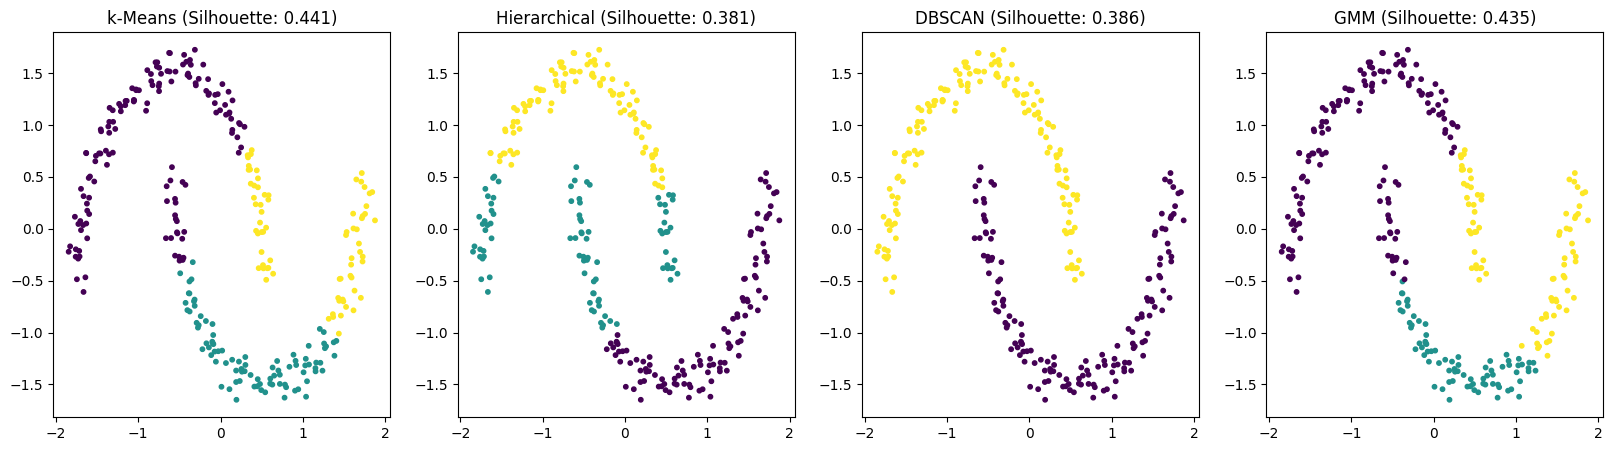

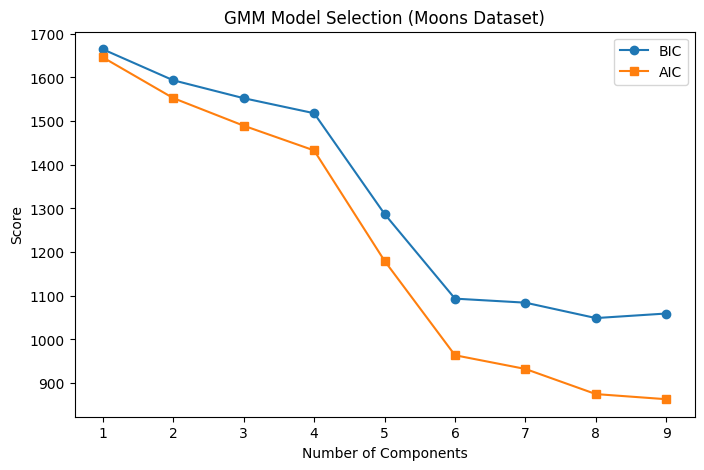

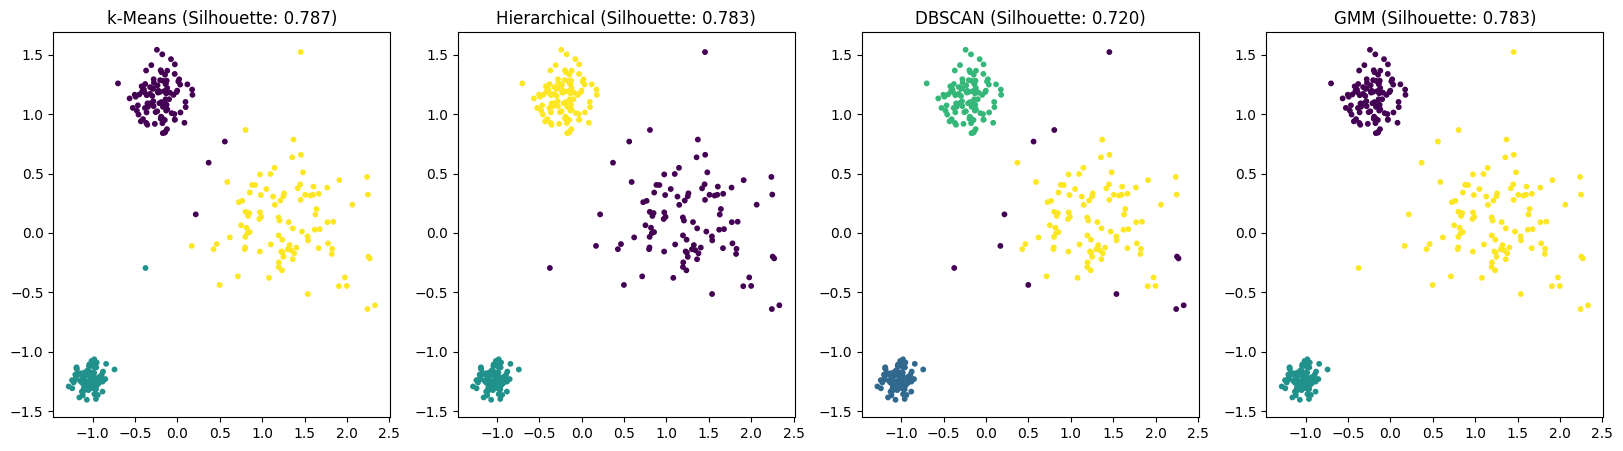

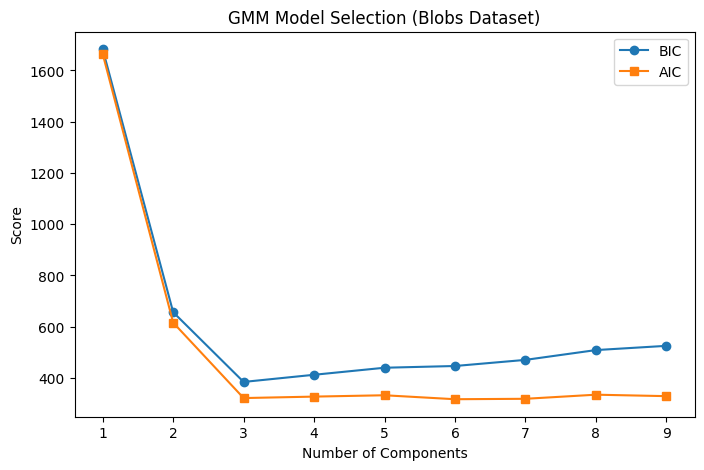

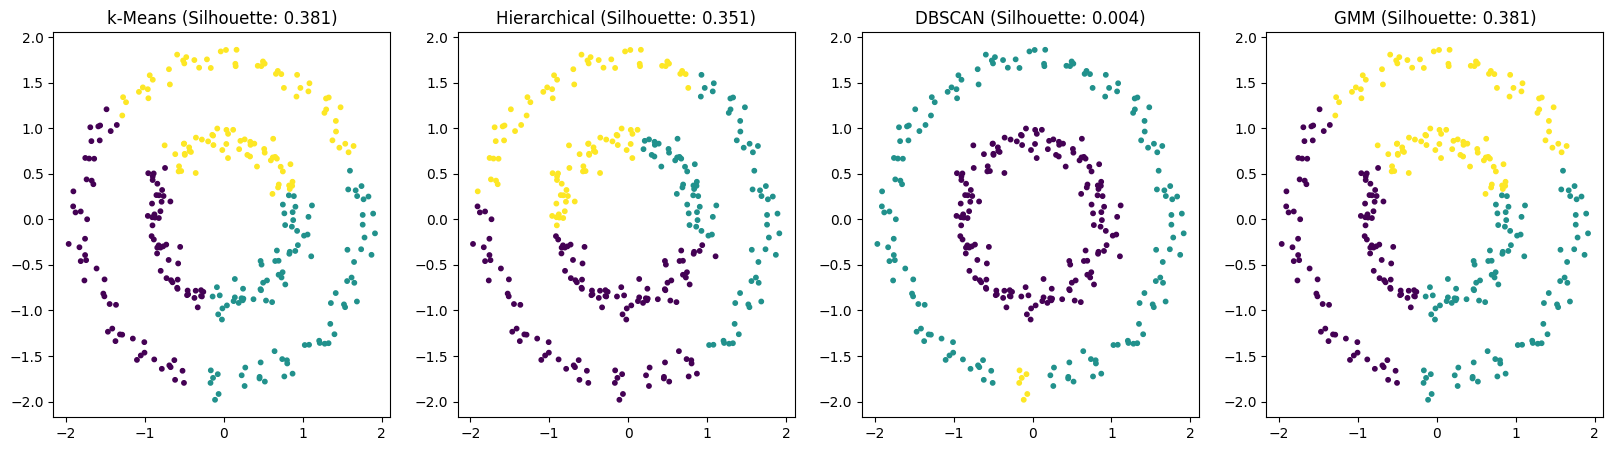

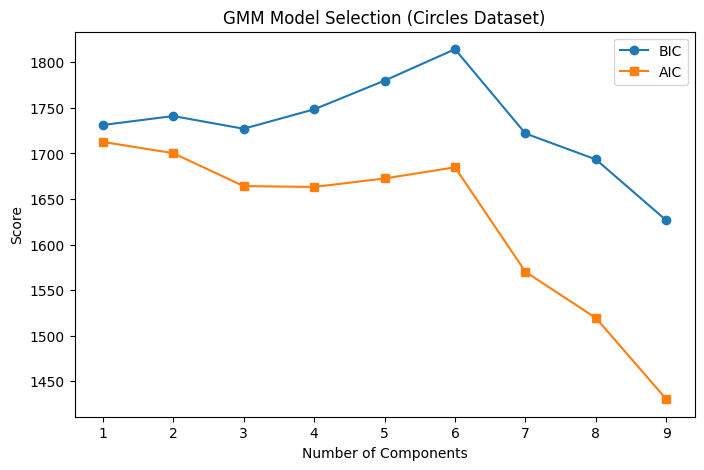

In [16]:
# Function to evaluate GMM with BIC and AIC
def evaluate_gmm(X, dataset_name):
    bic_scores, aic_scores = [], []
    for n in range(1, 10):
        gmm = GaussianMixture(n_components=n, random_state=42)
        gmm.fit(X)
        bic_scores.append(gmm.bic(X))
        aic_scores.append(gmm.aic(X))

    # Plot BIC & AIC
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 10), bic_scores, marker='o', label="BIC")
    plt.plot(range(1, 10), aic_scores, marker='s', label="AIC")
    plt.xlabel("Number of Components")
    plt.ylabel("Score")
    plt.legend()
    plt.title(f"GMM Model Selection ({dataset_name})")
    plt.savefig(f"{plots_folder}/{dataset_name.lower().replace(' ', '_')}_gmm_selection.png", dpi=300, bbox_inches="tight")
    plt.show()

    return {"Best BIC": np.argmin(bic_scores) + 1, "Best AIC": np.argmin(aic_scores) + 1}

# Apply clustering to all datasets and store results
silhouette_results = {}
gmm_evaluation_results = {}

for dataset_name, X in datasets.items():
    silhouette_results[dataset_name] = apply_clustering(X, dataset_name)
    gmm_evaluation_results[dataset_name] = evaluate_gmm(X, dataset_name)

Step 5: Print Results 

In [17]:
# Print Summary of Results
print("\n### Silhouette Score Summary ###")
for dataset, scores in silhouette_results.items():
    print(f"\n{dataset}:")
    for method, score in scores.items():
        print(f"  {method}: {score:.3f}")

print("\n### GMM Model Selection (BIC & AIC) ###")
for dataset, scores in gmm_evaluation_results.items():
    print(f"\n{dataset}:")
    print(f"  Optimal Components (BIC): {scores['Best BIC']}")
    print(f"  Optimal Components (AIC): {scores['Best AIC']}")


### Silhouette Score Summary ###

Moons Dataset:
  k-Means: 0.441
  Hierarchical: 0.381
  DBSCAN: 0.386
  GMM: 0.435

Blobs Dataset:
  k-Means: 0.787
  Hierarchical: 0.783
  DBSCAN: 0.720
  GMM: 0.783

Circles Dataset:
  k-Means: 0.381
  Hierarchical: 0.351
  DBSCAN: 0.004
  GMM: 0.381

### GMM Model Selection (BIC & AIC) ###

Moons Dataset:
  Optimal Components (BIC): 8
  Optimal Components (AIC): 9

Blobs Dataset:
  Optimal Components (BIC): 3
  Optimal Components (AIC): 6

Circles Dataset:
  Optimal Components (BIC): 9
  Optimal Components (AIC): 9


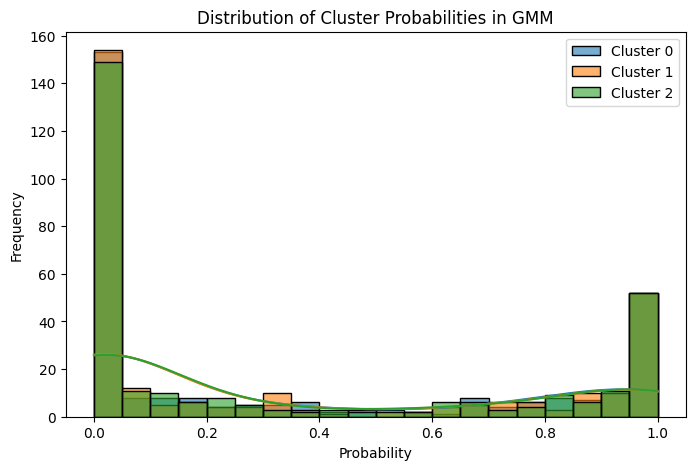

In [14]:
# Extract probability scores from the trained GMM model
probabilities = gmm.predict_proba(X)

# Plot histogram of cluster probabilities
plt.figure(figsize=(8, 5))
for i in range(probabilities.shape[1]):  # Loop over clusters
    sns.histplot(probabilities[:, i], bins=20, kde=True, label=f"Cluster {i}", alpha=0.6)

plt.title("Distribution of Cluster Probabilities in GMM")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("../plots/gmm_probability_histogram.png", dpi=300, bbox_inches="tight")
plt.show()




# Clustering Model Comparison Summary

## **1️⃣ Silhouette Score Analysis**
The **Silhouette Score** (ranging from -1 to 1) measures how well clusters are formed. **Higher values indicate better-defined clusters.** Here’s a brief comparison of the results:

| Dataset        | k-Means  | Hierarchical | DBSCAN  | GMM  |
|---------------|---------|-------------|--------|------|
| **Moons**     | **0.441** ✅ | 0.381 | 0.386 | 0.435 |
| **Blobs**     | **0.787** ✅ | 0.783 | 0.720 | 0.783 |
| **Circles**   | **0.381** ✅ | 0.351 | 0.004 ❌ | 0.381 |

### **Key Observations**
- **k-Means performed best overall** for **Blobs Dataset** (well-separated clusters).
- **GMM performed almost identically to k-Means**, showing its effectiveness in soft clustering.
- **Moons Dataset**: k-Means slightly outperformed GMM, but both performed well.
- **Circles Dataset**: k-Means and GMM were comparable, but DBSCAN struggled (as expected).

---

## **2️⃣ GMM Model Selection (BIC & AIC)**
Since GMM **determines the optimal number of clusters probabilistically**, we used **BIC (Bayesian Information Criterion)** and **AIC (Akaike Information Criterion)** to find the best number of Gaussian components.

| Dataset        | Optimal Components (BIC) | Optimal Components (AIC) |
|---------------|-------------------------|-------------------------|
| **Moons**     | 8 | 9 |
| **Blobs**     | **3** ✅ | 6 |
| **Circles**   | 9 | 9 |

### **Key Observations**
- **Blobs Dataset had an optimal BIC of 3 components**, confirming that **GMM correctly identified three clusters**.
- **Moons and Circles datasets** had **higher BIC/AIC values**, indicating more complex structures requiring additional components.
- **BIC and AIC selected slightly different values** for Moons and Blobs datasets, emphasizing that the ideal number of components can vary depending on the metric used.

---

## **3️⃣ Final Insights**
- **GMM is a strong alternative to k-Means**, performing similarly across datasets while providing **soft clustering (probabilistic assignments)**.
- **DBSCAN struggled on Circles Dataset**, confirming that density-based methods **aren’t always suitable for every dataset**.
- **Hierarchical clustering had mixed results**, performing slightly worse than k-Means but still reasonable.

✅ **Overall, k-Means and GMM performed the best for well-defined clusters, while DBSCAN and Hierarchical worked better for specific cases.**
